In [1]:
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125


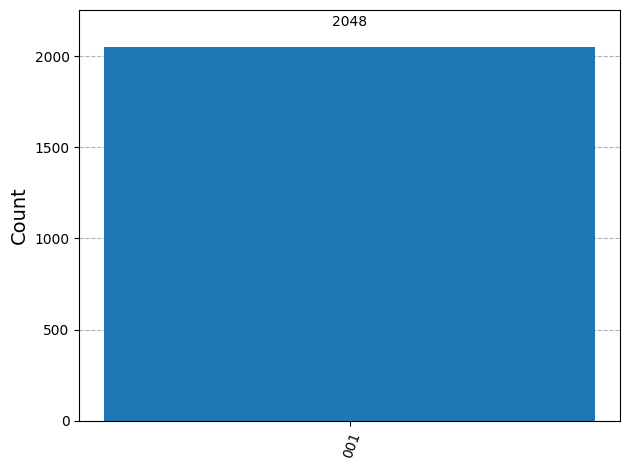

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

In [3]:
def qpe_circuit(num_count_qubits, unitary, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc




def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc




def run_qpe(num_count_qubits=3, theta=0.125):
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    display(plot_histogram(counts))
    print(qc.draw(output='text'))


if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)


Running Quantum Phase Estimation with phase 0.125


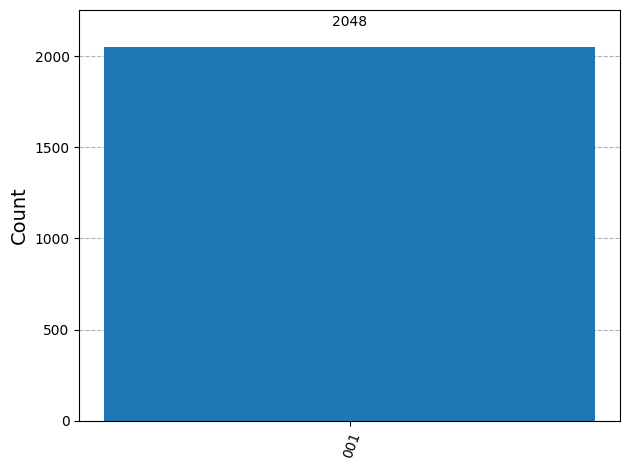

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

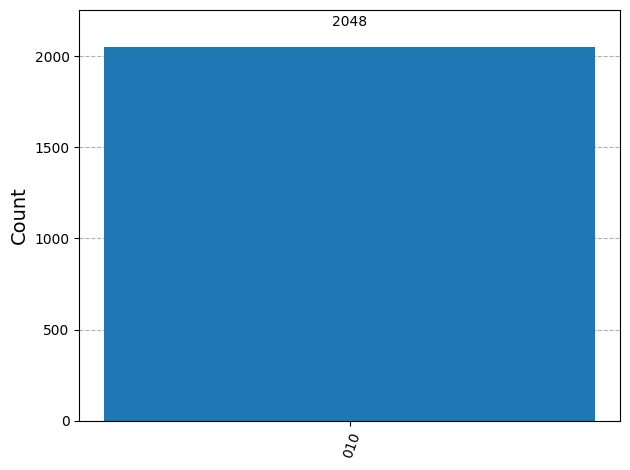

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

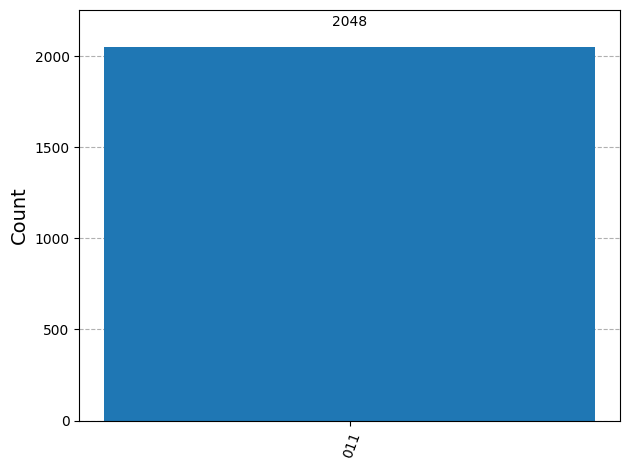

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐           
«q_0: ──────────┤M├───────────
«               └╥┘     ┌─┐   
«q_1: ─■─────────╫──────┤M├───
«      │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«q_2: ─■─────────╫─┤ H ├─╫─┤M├
«          

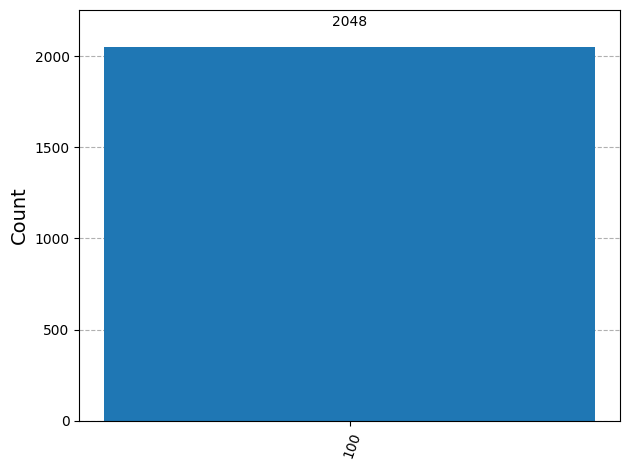

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                
«q_0: ───────────
«          ┌─┐   
«q_1: ─────┤M├───
«     ┌───┐└╥┘┌─┐
«q_2: ┤ H ├─╫─┤M├
«

In [4]:
#Task 1 - Change the Phase Value Try different values of theta (e.g., 0.25, 0.375, 0.5)

for theta in [0.125, 0.25, 0.375, 0.5]:
    print(f"Running Quantum Phase Estimation with phase {theta}")
    qc = run_qpe(3, theta)


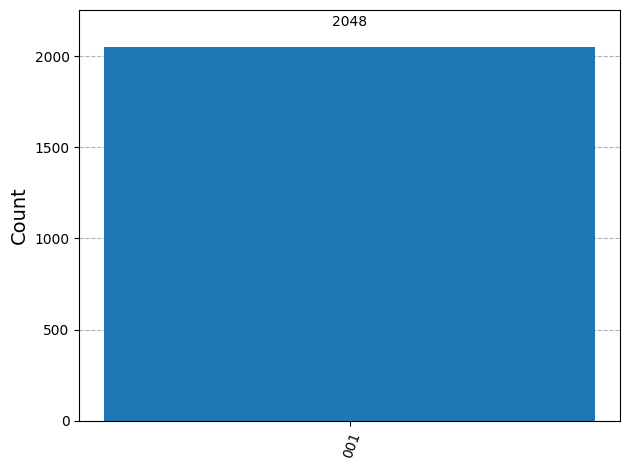

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─

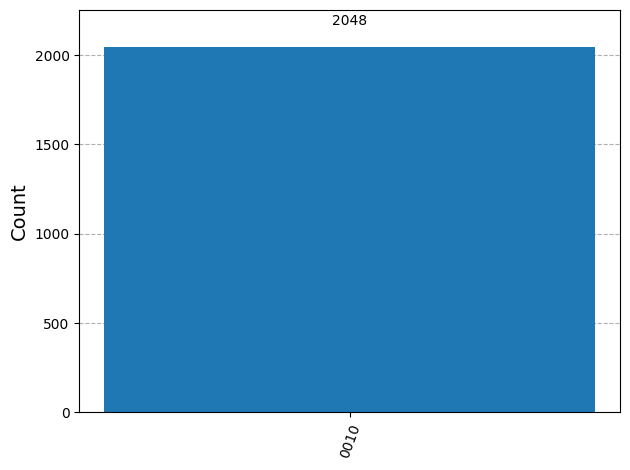

     ┌───┐                                    ┌───┐                         »
q_0: ┤ H ├─■────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼────────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │        │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼────────┼────────■────────X─────┼──────────────────────■────────»
     ├───┤ │        │        │              │                               »
q_3: ┤ H ├─┼────────┼────────┼──────■───────X───────────────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)                                  »
q_4: ┤ X ├─■────────■────────■──────■───────────────────────────────────────»
     └───┘                                                                  »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

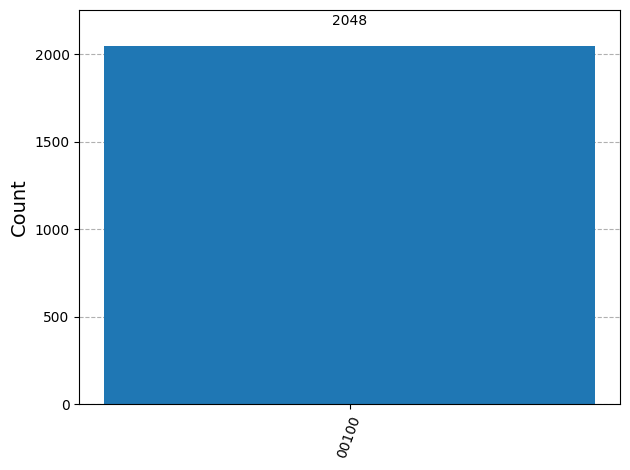

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                                                »
c: 5/═══════

In [5]:
#Task 2 - Increase the Number of Counting Qubits Use 4 or 5 counting qubits for higher precision phase estimation.

for num_qubits in [3, 4, 5]:
    theta = 0.125
    qc = run_qpe(num_qubits, theta)

In [6]:
#Task 3 - Compare with theoretical output

expected_decimal = int(theta * (2 ** num_count_qubits))
expected_binary = format(expected_decimal, f'{num_count_qubits}')

print(f"θ = {theta}")
print(f"Theoretical Output: {expected_binary} (binary for {expected_decimal}) if num_count_qubits = {num_count_qubits}")


θ = 0.125
Theoretical Output:   1 (binary for 1) if num_count_qubits = 3


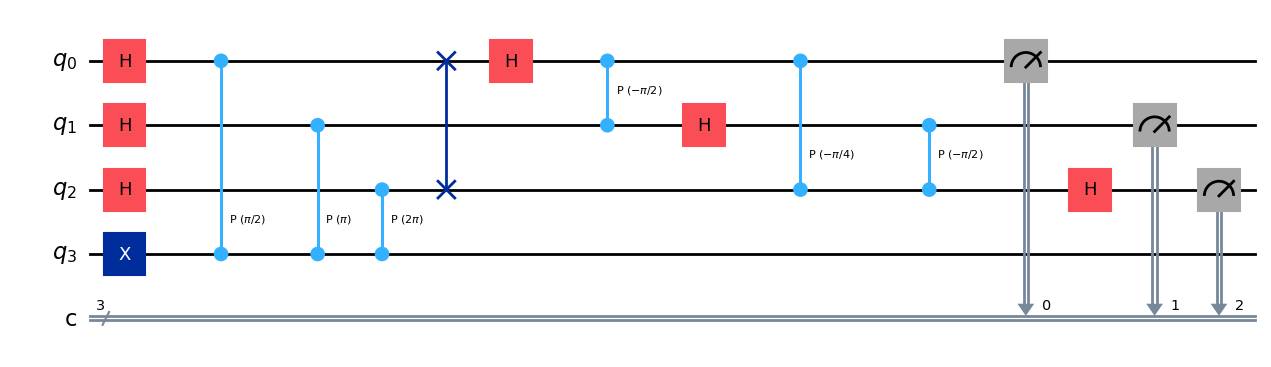

In [7]:
#Task 4 - Inverse QFT and Visualization with MPL

# Task 4: Inverse QFT Visualization

from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import numpy as np

def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

def qpe_circuit(num_count_qubits, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))
    qc.x(num_count_qubits)
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)
    inverse_qft(qc, num_count_qubits)
    qc.measure(range(num_count_qubits), range(num_count_qubits))
    return qc

theta = 0.25
qc = qpe_circuit(3, theta)
qc.draw('mpl')


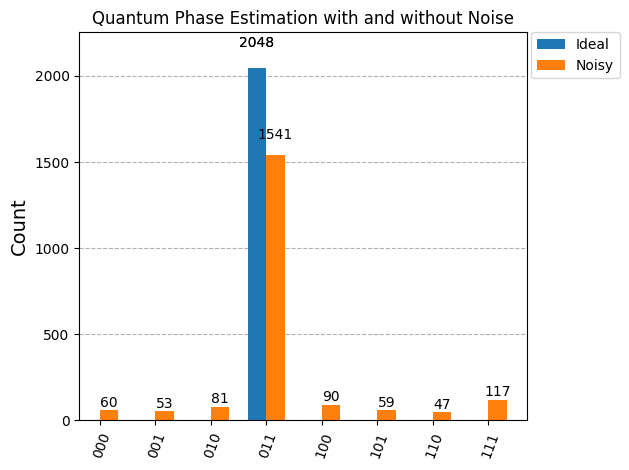

In [8]:
#Task 5 - Noise model

from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import transpile

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cp'])

sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=noise_model)

theta = 0.375
qc = qpe_circuit(3, theta)

compiled_ideal = transpile(qc, sim_ideal)
compiled_noisy = transpile(qc, sim_noisy)

result_ideal = sim_ideal.run(compiled_ideal, shots=2048).result()
result_noisy = sim_noisy.run(compiled_noisy, shots=2048).result()

ideal_counts = dict(result_ideal.get_counts())
noisy_counts = dict(result_noisy.get_counts())

display(plot_histogram(
    [ideal_counts, noisy_counts],
    legend=["Ideal", "Noisy"],
    title="Quantum Phase Estimation with and without Noise"
))
